## **1 | Abstract**

Introduction
Handwritten Digit Recognition is the process of digitizing human handwritten digit images. It is a difficult task for the machine because handwritten digits are not perfect and can be made with a variety of flavors. In order to address this issue, we created HDR, which uses the image of a digit to identify the digit that is present in the image.

In this project, we developed a Convolutional Neural Network (CNN) model using Tensorflow framework to Recognition of Handwritten Digit.

A convolutional neural network (CNN, or ConvNet) is a Deep Learning algorithm that can take in an input image, assign learnable weights and biases to various objects in the image and be able to distinguish one from the other.

It is used to analyse visual imagery. Object detection, face recognition, robotics, video analysis, segmentation, pattern recognition, natural language processing, spam detection, topic categorization, regression analysis, speech recognition, image classification are some of the examples that can be done using Convolutional Neural Networking.

**Approach**

We have used Sequential Keras model which has two pairs of Convolution2D and MaxPooling2D layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging. After that we will use Flatten layer to convert multidimensional parameters to vector.

The last layer has a Dense layer with 10 Softmax outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is 0, the 1-st output represents a probability that the input digit is 1 and so on...

**Result**
CNN performed well, providing validation accuracy and loss score of 98.9%% and 4.5% respectively.

**Conclusion**
Convolutional neural network (CNN, or ConvNet) can be used to predict Handwritten Digits reasonably. We have successfully developed Handwritten digit recognition with Python, Tensorflow, and Machine Learning libraries. Handwritten Digits have been recognized by more than 98.9% validation accuracy.

Keywords – convolutional neural network, mnist, deep learning, handwritten digits recognition.


## **2 | Import the dependencies and load the dataset**

We will import all of the modules that we will require to train our model.



In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.11.11
Tensorflow version: 2.18.0
Keras version: 3.8.0


In [9]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [10]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

In [11]:
train = pd.read_csv('/content/drive/MyDrive/ML Projects/train.csv (2)/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ML Projects/test.csv (2)/test.csv')

## **3 | Data Overview**


The MNIST dataset contains 42,000 training images of handwritten digits from zero to nine (10 different classes) and 28,000 images for testing without the label identifier (for submission). These images are the grayscaled pixel value and are represented as a 28×28 matrix.

### 3.1 | Dimension of train and test data

In [12]:
train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train.info(), train.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [14]:
test.info(),  test.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [15]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

### 3.2 | Visualizing the data using TSNE

TSNE - t-Distributed Stochastic Neighbor embedding. This is a dimensionality reduction algorithm that is designed to keep local structure in the high dimensional data set, but cares less about global structure. Here, we use it to go from the 784 pixel-dimension of the images to two dimensions. This makes plotting easier. The color scale is the original MNIST label and one can see that the separation of the labels is apparent.

In [16]:
# WARNING: running t-SNE on the full data set takes a while.
X_tsn = X/255

from sklearn.manifold import TSNE
tsne = TSNE()

tsne_res = tsne.fit_transform(X_tsn)

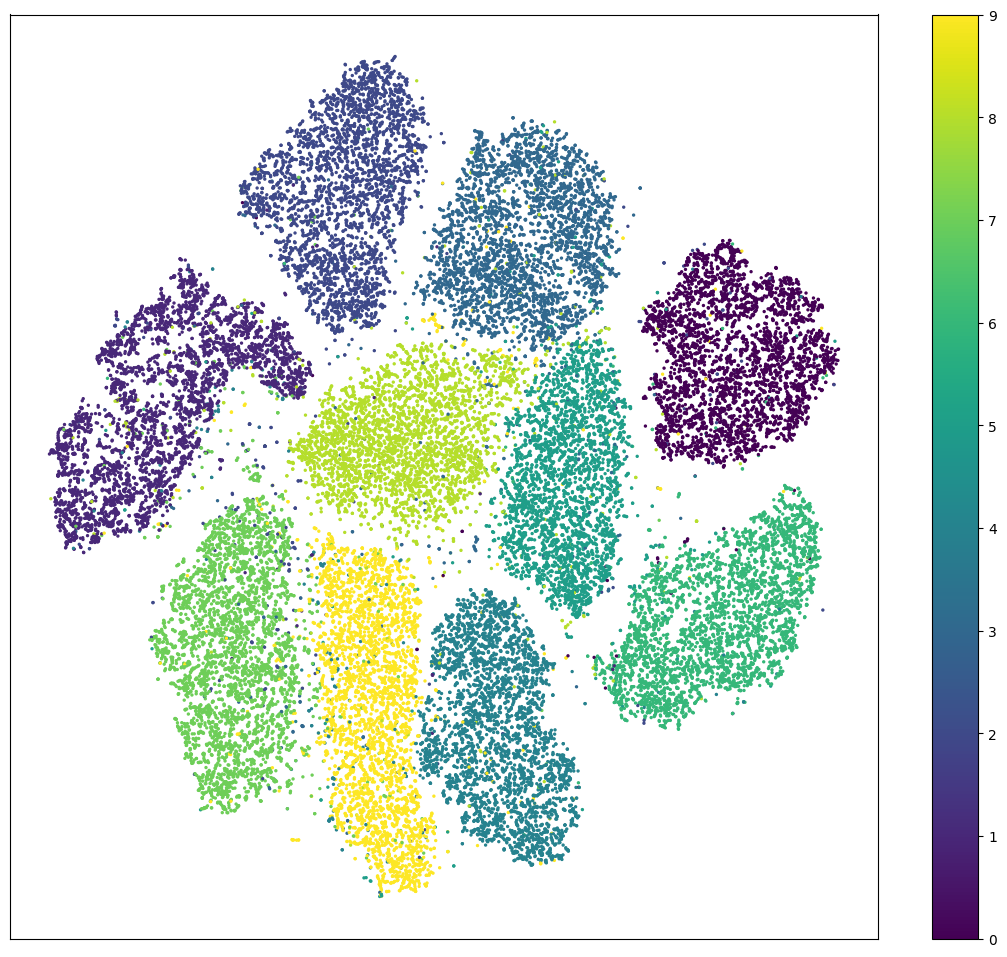

In [17]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();

### 3.3 | Splitting data into training and validation dataset¶
Back to Table of Contents

We are dividing our dataset (X) into two parts.

The training dataset (80%) is used to fit our models
The Validation dataset (20%) is used to evaluate our models
train_test_split() method returns us the training data, its labels and also the validation data and its labels.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

### 3.4 | Dimension of training and validation data

In [19]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


### 3.5 | Converting training, testing, and validation data into array

In [20]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

### 3.6 | Dimension of training, testing, and validation data after reshaping

In [21]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [22]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);


IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


## **4 | Explore the data**

In [23]:
pd.DataFrame(x_train_re[0])


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


### 4.1 | Visualise how the digits were written
This number matrix may be drawn as follows:



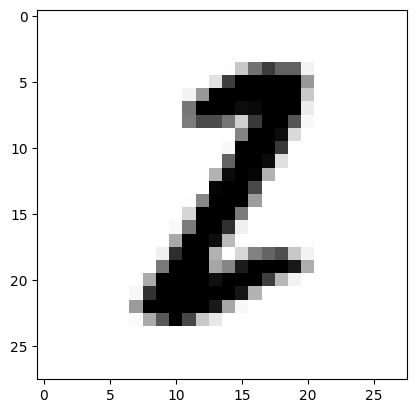

In [24]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

### Let's print some more training examples to get the feeling of how the digits were written.



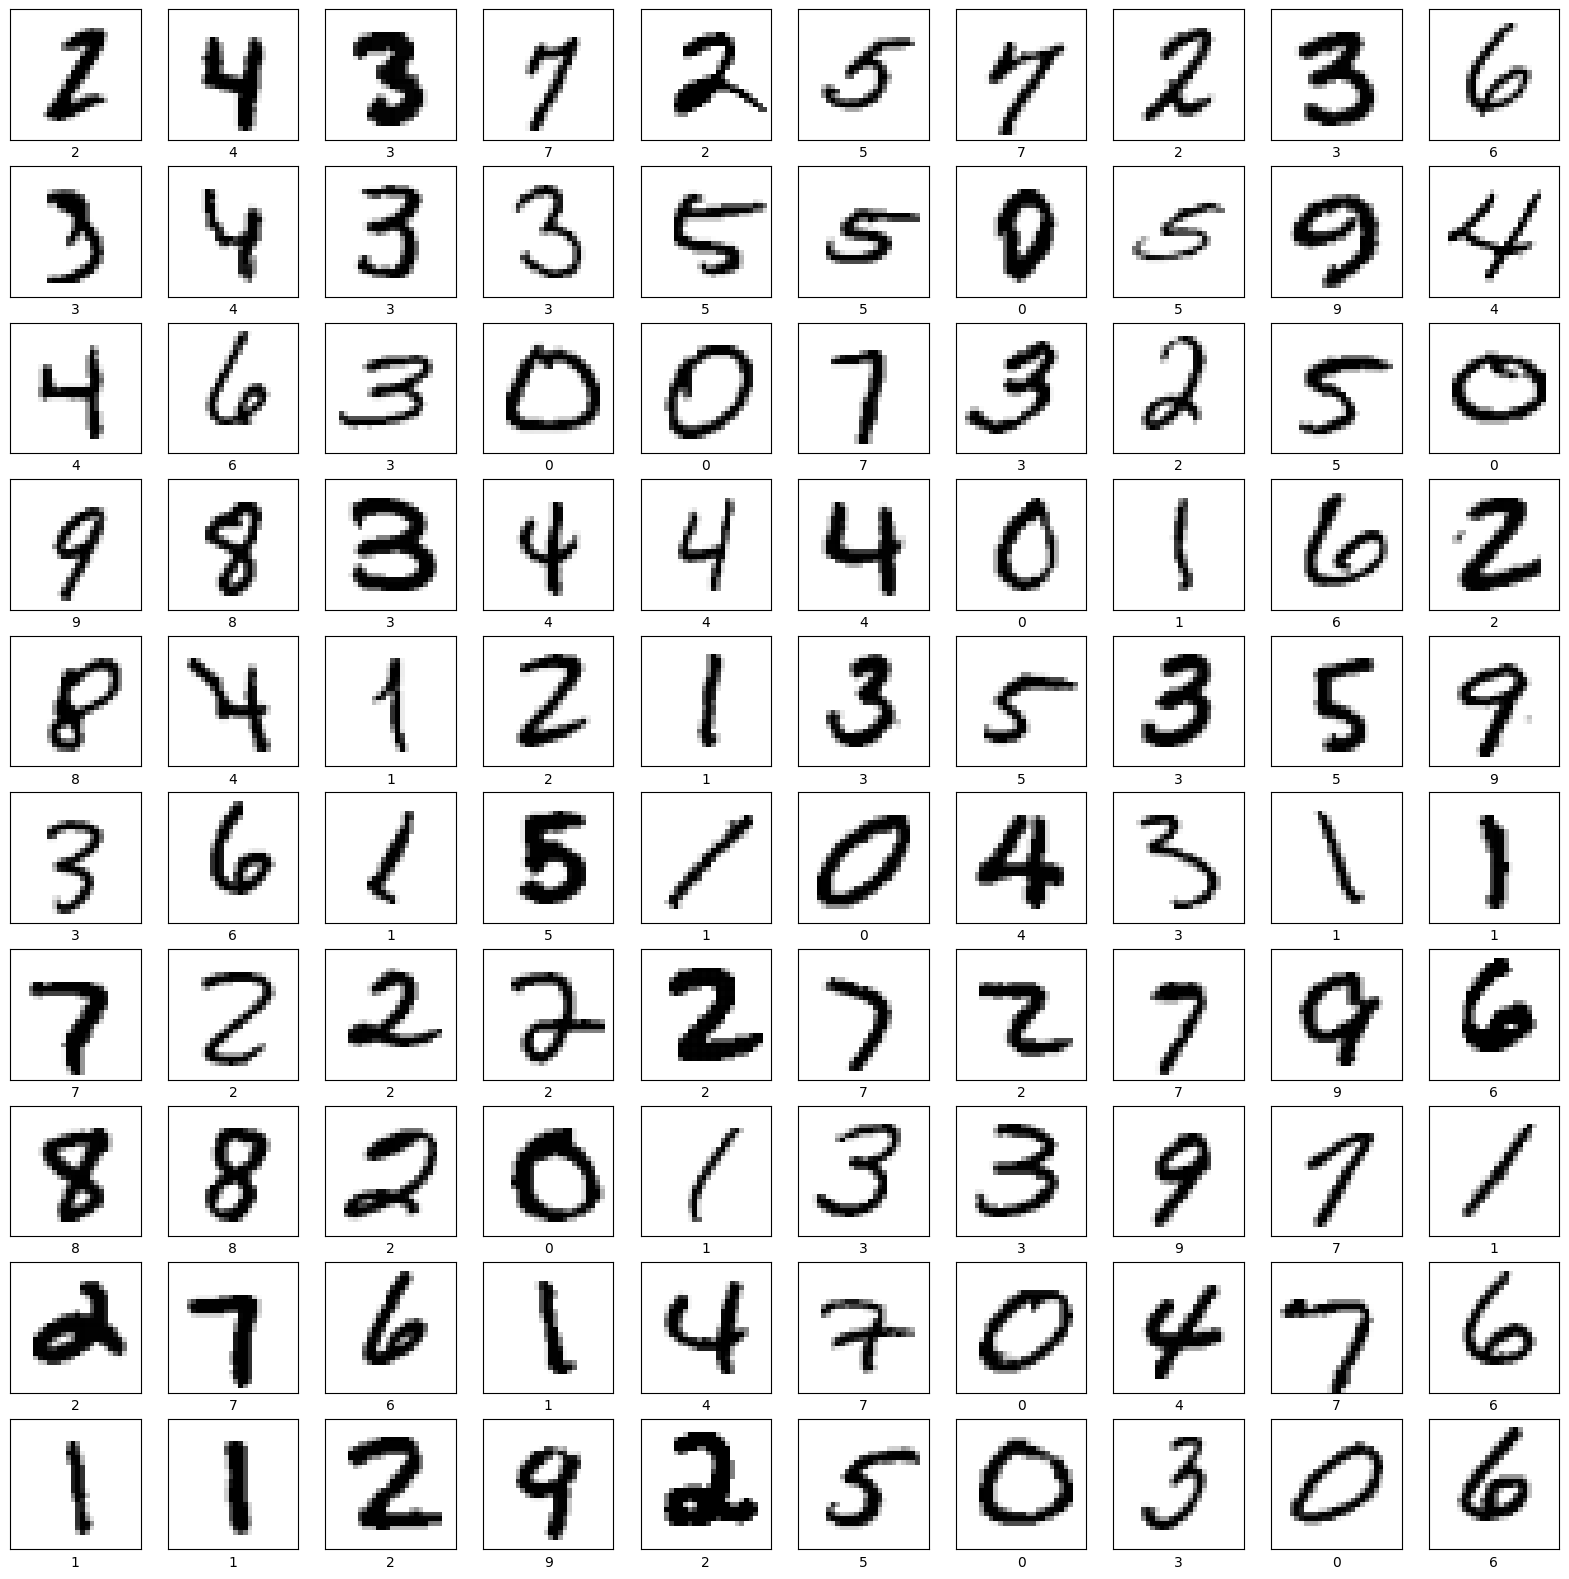

In [25]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

### 4.2 | Reshaping train, test, and validation data ¶


In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of (28, 28) which means that it is a 28x28 matrix of color values form 0 to 255. We need to reshape it to (28, 28, 1) shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [26]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [27]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


### 4.3 | Normalize train, test, and validation data


Here we're just trying to normalize from values range of [0...255] to [0...1].

In [28]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [29]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## **5 | Build the CNN model to Classify Handwritten Digits**

A Convolutional Neural Network model generally consists of convolutional and pooling layers.

We are using Sequential Keras model which have two pairs of Convolution2D and MaxPooling2D layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use Flatten layer to convert multidimensional parameters to vector.

The last layer will be a Dense layer with 10 Softmax outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is 0, the 1-st output represents a probability that the input digit is 1 and so on...

In [30]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 5.1 | Summary of the training model ¶

Here is our model summary so far.


In [31]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

### 5.2 | Visualization of the model ¶

In order to plot the model the graphviz should be installed.

A model summary that describes the various layers defined in the model.

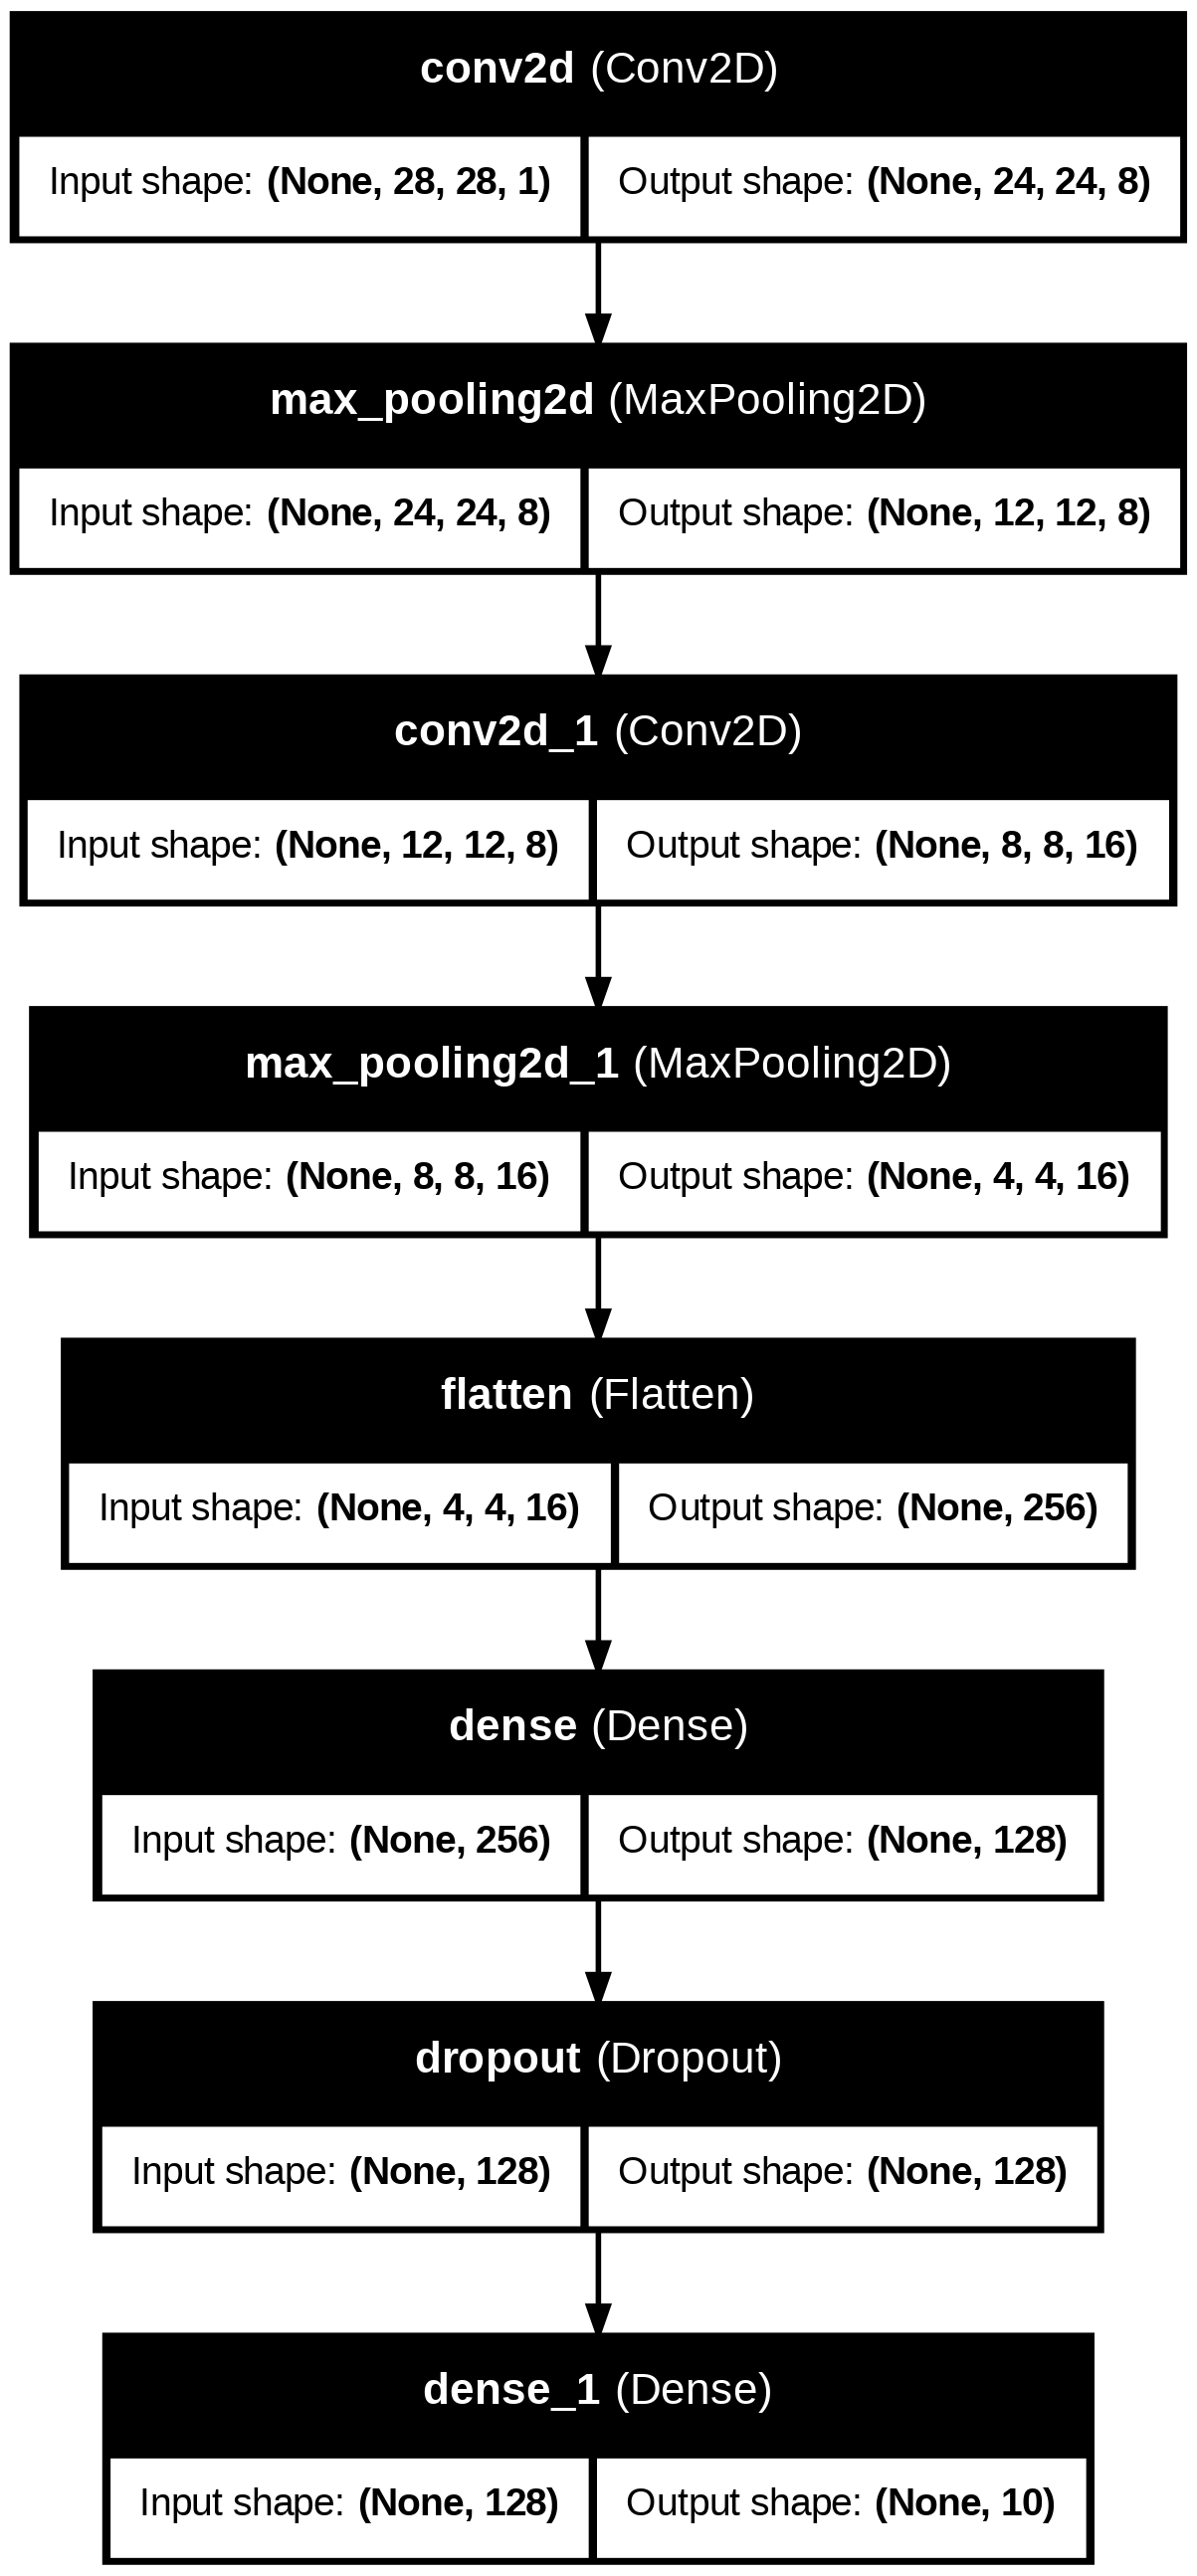

In [32]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

### 5.3 | Compile the model using keras.optimizers.Adam ¶


In [33]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

### 5.4 | Train the model ¶


In [34]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.8236 - loss: 0.5669 - val_accuracy: 0.9737 - val_loss: 0.0873
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9711 - loss: 0.0935 - val_accuracy: 0.9811 - val_loss: 0.0629
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9800 - loss: 0.0634 - val_accuracy: 0.9793 - val_loss: 0.0654
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9834 - loss: 0.0517 - val_accuracy: 0.9852 - val_loss: 0.0532
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9861 - loss: 0.0403 - val_accuracy: 0.9861 - val_loss: 0.0472
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9890 - loss: 0.0335 - val_accuracy: 0.9826 - val_loss: 0.0578
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9904 - loss: 0.0293 - val_accuracy: 0.9843 - val_loss: 0.0559
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9926 -

## **6 | Model evaluation ¶**


### 6.1 | Loss plot curve for training and validation

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller with every next epoch.

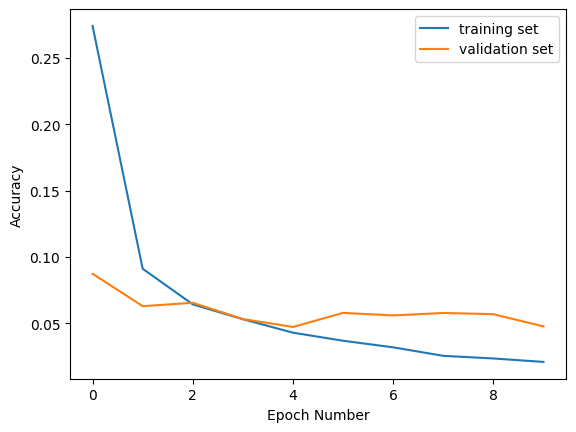

In [35]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

### 6.2 | Accuracy plot curve for training and validation


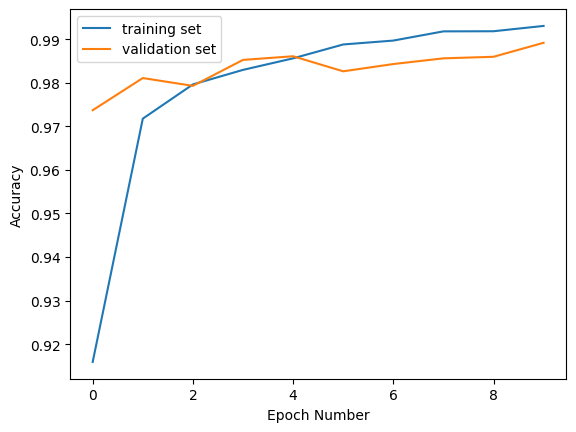

In [36]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

### 6.3 | Evaluation of the model accuracy

We need to compare the accuracy of our model on training set and on valiation set. We expect our model to perform similarly on both sets. If the performance on a validation set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### 6.3.1 | Performance of training dataset ¶


In [37]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

In [38]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.008401995524764061
Train accuracy:  0.9975595474243164


### 6.3.2 | Performance of validation dataset


In [39]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

In [40]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.047611478716135025
Validation accuracy:  0.9891666769981384


### 6.3.3 | Save and load the model

We will save the entire model to a HDF5 file. The .h5 extension of the file indicates that the model shuold be saved in Keras format as HDF5 file.

In [41]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [42]:
loaded_model = tf.keras.models.load_model(model_name)


### 6.3.4 | Visualise validation predicted data on how the digits were written

To use the model that we've just trained for digits recognition we need to call predict() method.

In [43]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])


 24/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


In [44]:
print('predictions_one_hot:', predictions_one_hot.shape)


predictions_one_hot: (8400, 10)


Each prediction consists of 10 probabilities (one for each number from 0 to 9). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [46]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.586665e-10,9.999999e-01,3.471915e-09,1.202748e-14,1.404926e-08,6.893195e-14,2.176339e-09,3.768212e-08,1.194250e-08,4.237727e-11
1,1.364911e-13,3.606339e-08,3.732114e-06,9.999424e-01,3.484351e-10,2.664400e-06,1.089220e-12,4.521437e-09,2.266781e-08,5.113454e-05
2,1.064316e-14,4.024100e-11,4.621271e-07,1.952946e-09,1.086609e-13,1.042855e-10,7.575060e-12,2.674945e-14,9.999995e-01,3.594979e-12
3,8.532131e-10,9.999920e-01,1.251659e-08,6.233876e-10,1.186303e-06,1.180729e-10,1.153564e-08,6.665865e-06,8.559360e-08,6.267511e-09
4,8.099163e-13,1.595498e-14,5.118346e-10,4.609841e-08,2.181978e-07,2.998732e-11,8.096057e-17,3.154337e-07,2.163698e-06,9.999972e-01
...,...,...,...,...,...,...,...,...,...,...
8395,1.024152e-14,1.369693e-15,9.293968e-16,6.960114e-17,9.999999e-01,5.759871e-12,6.393585e-11,3.778714e-15,3.346956e-12,3.670288e-11
8396,1.607394e-12,3.054907e-10,7.346080e-15,3.441920e-09,4.459584e-12,9.999997e-01,7.091914e-08,2.885050e-17,1.314929e-07,4.523702e-11
8397,3.098178e-13,1.784181e-13,1.077701e-13,9.818347e-13,1.249550e-08,1.857490e-11,2.351424e-17,9.999997e-01,2.301777e-10,2.242092e-07
8398,4.267798e-10,2.616845e-11,3.378727e-14,9.443574e-15,9.239614e-13,1.537313e-08,9.999999e-01,1.563139e-17,1.313837e-09,4.803571e-13


In [47]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


So our model is predicting that the first example from the validation set is 1.

Let's print the first image from a validation set to see if model's prediction is correct.

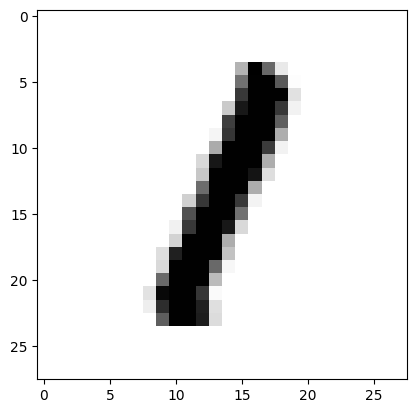

In [48]:
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit 1. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

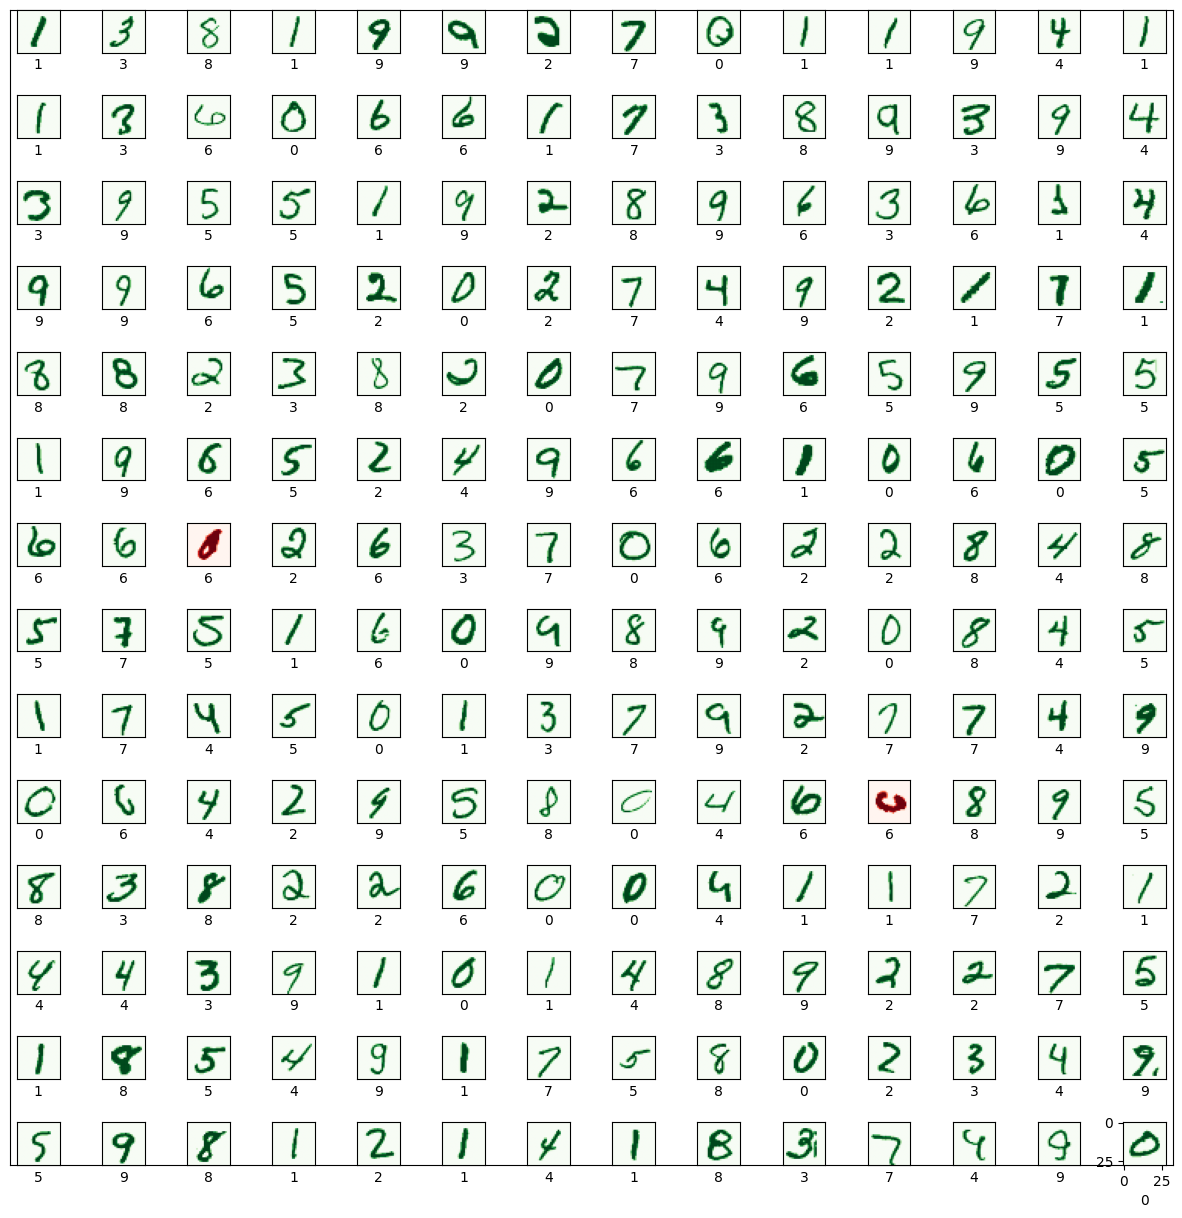

In [49]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

### 6.3.5 | Confusion matrix of validation dataset

Confusion matrix shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly.

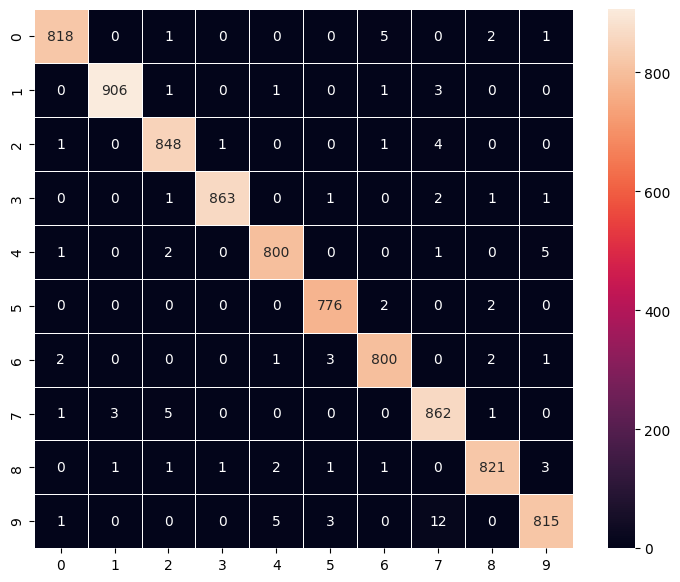

In [50]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## 7 | Model prediction on unseen dataset (test data)

In [51]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
predictions_one_hot: (28000, 10)


Each prediction has ten probabilities (one for each number from 0 to 9). We need to choose the digit with the highest probability.

Predicted probabilities of all digits.

In [52]:
pd.DataFrame(predictions_one_hot)


,0,1,2,3,4,5,6,7,8,9
0,2.613476e-09,3.232286e-10,9.999998e-01,2.974618e-09,3.918180e-11,8.157057e-13,8.645480e-13,1.330704e-07,3.644576e-10,7.101196e-13
1,9.999086e-01,3.506885e-12,5.544946e-06,1.510954e-10,1.291406e-11,3.947387e-07,7.094434e-06,2.992325e-07,4.130324e-08,7.795387e-05
2,7.395049e-10,8.503719e-09,2.172024e-07,1.870386e-06,1.364883e-04,1.617910e-09,6.153323e-13,6.912325e-06,4.941945e-05,9.998050e-01
3,5.985029e-02,4.233607e-06,2.430257e-04,7.626874e-05,1.395208e-04,3.174305e-06,3.922443e-06,3.298266e-03,9.184102e-05,9.362894e-01
4,1.241232e-15,6.098250e-09,1.556903e-06,9.999906e-01,8.043876e-12,4.522037e-08,2.337572e-13,1.191876e-09,7.471074e-06,3.191456e-07
...,...,...,...,...,...,...,...,...,...,...
27995,3.685860e-13,2.407239e-13,3.396756e-11,6.731616e-07,2.735534e-08,5.238522e-10,6.489062e-18,6.390125e-08,6.762128e-07,9.999985e-01
27996,5.330337e-09,2.026053e-12,1.759104e-08,8.178930e-08,2.401926e-08,6.958649e-09,1.493809e-13,9.999456e-01,4.859531e-10,5.427223e-05
27997,3.821939e-25,5.220455e-14,2.361542e-13,9.999999e-01,5.535230e-20,1.540076e-14,9.692329e-24,3.001696e-13,1.708499e-13,1.640305e-12
27998,1.326328e-10,1.455980e-10,2.734504e-09,3.949694e-07,3.841751e-07,3.173653e-09,3.905626e-13,2.977935e-06,1.124564e-07,9.999960e-01


### 7.1 | Visualise test predicted data how the digits were written

Predicted digits with highest probabilites

Actual first digit from the test data


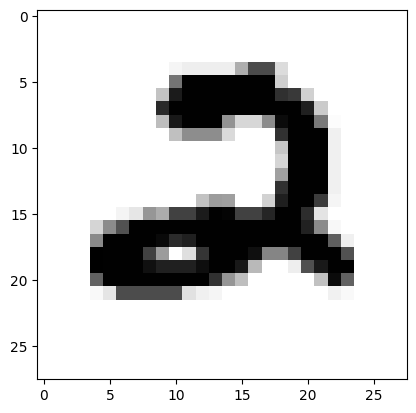

In [53]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

So our model is predicting that the first example from the test data is 2.



## 8 | Submission


In [54]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [55]:
test_pred.to_csv('submission.csv', index = False)
